# Regression of viscosity data

This notebook is a short example on how to use the regression classes available in GlassPy to analyze equilibrium viscosity data collected at different temperatures.

This example assumes that GlassPy and all its dependencies are installed in the machine or virtual environment being used.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from glasspy.viscosity.regression import MYEGA

## Data

For this simple example, data will be provided as python objects. 

Variable "temperature" has unit of [Kelvin] and variable "viscosity" has unit of [Pascal.second].

A pandas DataFrame object is defined at the end. To use the regression classes, we need a DataFrame with at least a "temperature" and a "log_viscosity" column. Any additional columns are stored in the regression Class but are not used during the regression.

In [2]:
temperature = [1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036,
               1037, 1038, 1039, 1040, 1040, 1041, 1042, 1042, 1043, 1044,
               1045, 1045, 1046, 1047, 1048, 1049, 1049, 1050, 1067, 1067,
               1068, 1069, 1070, 1071, 1072, 1072, 1073, 1074, 1075, 1075,
               1076, 1077, 1078, 1079, 1080, 1080, 1081, 1082, 1083, 1084,
               1085, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093,
               1093, 1094, 1095, 1095, 1096, 1097, 1098, 1594, 1614, 1634,
               1654, 1673, 1692, 1712, 1730]

viscosity = [2.51E10, 2.51E10, 2.00E10, 2.00E10, 1.58E10, 1.58E10, 1.26E10,
             1.00E10, 1.00E10, 1.00E10, 7.94E09, 6.31E09, 6.31E09, 6.31E09,
             5.01E09, 5.01E09, 3.98E09, 3.98E09, 3.16E09, 3.16E09, 3.16E09,
             2.51E09, 2.51E09, 2.51E09, 2.00E09, 2.00E09, 1.58E09, 1.58E09,
             3.16E08, 2.51E08, 2.51E08, 2.51E08, 2.00E08, 2.00E08, 2.00E08,
             1.58E08, 1.58E08, 1.58E08, 1.58E08, 1.26E08, 1.26E08, 1.26E08,
             1.00E08, 1.00E08, 1.00E08, 7.94E07, 7.94E07, 7.94E07, 6.31E07,
             6.31E07, 6.31E07, 5.01E07, 5.01E07, 5.01E07, 3.98E07, 3.98E07,
             3.98E07, 3.16E07, 3.16E07, 3.16E07, 2.51E07, 2.51E07, 2.51E07,
             2.00E07, 2.00E07, 2.00E07, 2.00E07, 2.51E00, 2.00E00, 1.58E00,
             1.58E00, 1.26E00, 1.00E00, 7.94E-01, 7.94E-01]

log_viscosity = np.log10(viscosity)

data = {'temperature':temperature, 'log_viscosity':log_viscosity}
data_table = pd.DataFrame(data)

## Regression of the MYEGA expression

First, we create a regressor object.

In [3]:
regressor = MYEGA(table=data_table)

We can retrieve the original data from the regressor.

In [4]:
print(regressor.table)

    temperature  log_viscosity
0          1027      10.399674
1          1028      10.399674
2          1029      10.301030
3          1030      10.301030
4          1031      10.198657
5          1032      10.198657
6          1033      10.100371
7          1034      10.000000
8          1035      10.000000
9          1036      10.000000
10         1037       9.899821
11         1038       9.800029
12         1039       9.800029
13         1040       9.800029
14         1040       9.699838
15         1041       9.699838
16         1042       9.599883
17         1042       9.599883
18         1043       9.499687
19         1044       9.499687
20         1045       9.499687
21         1045       9.399674
22         1046       9.399674
23         1047       9.399674
24         1048       9.301030
25         1049       9.301030
26         1049       9.198657
27         1050       9.198657
28         1067       8.499687
29         1067       8.399674
..          ...            ...
45      

The default behavior of the class initiation is to fit the data. We can check the results.

In [5]:
print(regressor.fitresult.fit_report())

[[Model]]
    Model(MYEGA)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 75
    # variables        = 3
    chi-square         = 0.11193389
    reduced chi-square = 0.00155464
    Akaike info crit   = -482.050121
    Bayesian info crit = -475.097657
[[Variables]]
    log_eta_inf: -1.80546885 +/- 0.03888761 (2.15%) (init = -1.805469)
    T12:          1000.14901 +/- 0.30299789 (0.03%) (init = 1000.149)
    m:            64.5345707 +/- 0.34154230 (0.53%) (init = 64.53457)
    K:            350.164629 +/- 13.4761081 (3.85%) == '(12-log_eta_inf)*T12*exp(1-m/(12-log_eta_inf))'
    C:            3675.11320 +/- 37.1778713 (1.01%) == 'T12*(m/(12-log_eta_inf)-1)'
[[Correlations]] (unreported correlations are < 0.100)
    C(T12, m)           =  0.938
    C(log_eta_inf, m)   =  0.802
    C(log_eta_inf, T12) =  0.710



We can plot the data with the regression.

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

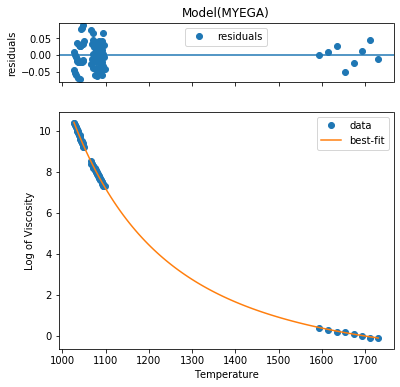

In [6]:
regressor.fitresult.plot(xlabel='Temperature', ylabel='Log of Viscosity', numpoints=100)